# Practice notebook for univariate analysis using NHANES data

This notebook will give you the opportunity to perform some univariate analyses on your own using the NHANES.  These analyses are similar to what was done in the week 2 NHANES case study notebook.

You can enter your code into the cells that say "enter your code here", and you can type responses to the questions into the cells that say "Type Markdown and Latex".

Note that most of the code that you will need to write below is very similar to code that appears in the case study notebook.  You will need to edit code from that notebook in small ways to adapt it to the prompts below.

To get started, we will use the same module imports and read the data in the same way as we did in the case study:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np

da = pd.read_csv("nhanes_2015_2016.csv")

In [2]:
da.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


In [3]:
da.columns


Index(['SEQN', 'ALQ101', 'ALQ110', 'ALQ130', 'SMQ020', 'RIAGENDR', 'RIDAGEYR',
       'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'WTINT2YR',
       'SDMVPSU', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2',
       'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC',
       'BMXWAIST', 'HIQ210'],
      dtype='object')

In [4]:
da.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5735 entries, 0 to 5734
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      5735 non-null   int64  
 1   ALQ101    5208 non-null   float64
 2   ALQ110    1731 non-null   float64
 3   ALQ130    3379 non-null   float64
 4   SMQ020    5735 non-null   int64  
 5   RIAGENDR  5735 non-null   int64  
 6   RIDAGEYR  5735 non-null   int64  
 7   RIDRETH1  5735 non-null   int64  
 8   DMDCITZN  5734 non-null   float64
 9   DMDEDUC2  5474 non-null   float64
 10  DMDMARTL  5474 non-null   float64
 11  DMDHHSIZ  5735 non-null   int64  
 12  WTINT2YR  5735 non-null   float64
 13  SDMVPSU   5735 non-null   int64  
 14  SDMVSTRA  5735 non-null   int64  
 15  INDFMPIR  5134 non-null   float64
 16  BPXSY1    5401 non-null   float64
 17  BPXDI1    5401 non-null   float64
 18  BPXSY2    5535 non-null   float64
 19  BPXDI2    5535 non-null   float64
 20  BMXWT     5666 non-null   floa

In [5]:
for column in da.columns:
    unique_values = da[column].unique()
    if len(unique_values) < 15:
        print(f"Unique values in '{column}': {unique_values}")

Unique values in 'ALQ101': [ 1.  2. nan  9.]
Unique values in 'ALQ110': [nan  1.  2.  9.  7.]
Unique values in 'SMQ020': [1 2 7 9]
Unique values in 'RIAGENDR': [1 2]
Unique values in 'RIDRETH1': [3 4 1 5 2]
Unique values in 'DMDCITZN': [ 1.  2.  9.  7. nan]
Unique values in 'DMDEDUC2': [ 5.  3.  4.  2. nan  1.  9.]
Unique values in 'DMDMARTL': [ 1.  3.  6.  4.  5. nan  2. 77.]
Unique values in 'DMDHHSIZ': [2 1 5 3 4 7 6]
Unique values in 'SDMVPSU': [1 2]
Unique values in 'HIQ210': [ 2. nan  1.  9.]


## Question 1

Relabel the marital status variable [DMDMARTL](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDMARTL) to have brief but informative character labels.  Then construct a frequency table of these values for all people, then for women only, and for men only.  Then construct these three frequency tables using only people whose age is between 30 and 40.

In [6]:
da["DMDMARTLx"] = da. DMDMARTL.replace({1: "Married", 2: "Widowed", 3: "Divorced", 4: "Separated", 5: "Never married", 6:"Living with partner", 77: "Refused", 99: "Don't know"})


In [7]:
da["DMDMARTLx"].value_counts()

Married                2780
Never married          1004
Divorced                579
Living with partner     527
Widowed                 396
Separated               186
Refused                   2
Name: DMDMARTLx, dtype: int64

In [8]:
# for RIAGENDR 2 is female
da.loc[da['RIAGENDR']== 2, ["DMDMARTLx"]].value_counts()

DMDMARTLx          
Married                1303
Never married           520
Divorced                350
Widowed                 296
Living with partner     262
Separated               118
Refused                   1
dtype: int64

In [9]:
# for RIAGENDR 1 is male
da.loc[da['RIAGENDR']== 1, ["DMDMARTLx"]].value_counts()

DMDMARTLx          
Married                1477
Never married           484
Living with partner     265
Divorced                229
Widowed                 100
Separated                68
Refused                   1
dtype: int64

In [10]:
# creating new data frame with age range
dx = da[(da['RIDAGEYR'] >= 30) & (da['RIDAGEYR'] <= 40)]

In [11]:
dx["DMDMARTLx"].value_counts()

Married                560
Never married          217
Living with partner    143
Divorced                70
Separated               30
Widowed                  5
Refused                  1
Name: DMDMARTLx, dtype: int64

In [12]:
dx.loc[da['RIAGENDR']== 2, ["DMDMARTLx"]].value_counts()

DMDMARTLx          
Married                285
Never married          116
Living with partner     65
Divorced                46
Separated               18
Widowed                  2
dtype: int64

In [13]:
dx.loc[da['RIAGENDR']== 1, ["DMDMARTLx"]].value_counts()

DMDMARTLx          
Married                275
Never married          101
Living with partner     78
Divorced                24
Separated               12
Widowed                  3
Refused                  1
dtype: int64

__Q1a.__ Briefly comment on some of the differences that you observe between the distribution of marital status between women and men, for people of all ages.

__Q1b.__ Briefly comment on the differences that you observe between the distribution of marital status states for women between the overall population, and for women between the ages of 30 and 40.

__Q1c.__ Repeat part b for the men.

## Question 2

Restricting to the female population, stratify the subjects into age bands no wider than ten years, and construct the distribution of marital status within each age band.  Within each age band, present the distribution in terms of proportions that must sum to 1.

In [14]:
da.loc[da['RIAGENDR']== 2, ['RIDAGEYR']].describe()

,RIDAGEYR
count,2976.000000
mean,47.793011
std,18.299419
min,18.000000
25%,32.000000
50%,47.000000
75%,62.000000
max,80.000000


In [15]:
bins = [18, 28, 38, 48, 58, 68, 78, 88]
labels = ['18-27', '28-37', '38-47', '48-57', '58-67', '68-77', '78-87']

da['AgeStrata'] = pd.cut(da['RIDAGEYR'], bins=bins, labels=labels, right=False)

In [16]:
dv=da[da['RIAGENDR'] == 2].groupby('AgeStrata')["DMDMARTLx"].value_counts()
dv

AgeStrata  DMDMARTLx          
18-27      Never married          207
           Married                 85
           Living with partner     78
           Separated                8
           Divorced                 5
28-37      Married                257
           Never married          126
           Living with partner     84
           Divorced                31
           Separated               15
           Widowed                  1
38-47      Married                284
           Never married           72
           Divorced                69
           Living with partner     40
           Separated               25
           Widowed                  6
48-57      Married                257
           Divorced                85
           Never married           43
           Living with partner     34
           Separated               31
           Widowed                 27
58-67      Married                235
           Divorced                84
           Widowed 

In [17]:
dv=dv.unstack()

In [18]:
dv

DMDMARTLx,Divorced,Living with partner,Married,Never married,Refused,Separated,Widowed
AgeStrata,,,,,,,
18-27,5.0,78.0,85.0,207.0,NaN,8.0,NaN
28-37,31.0,84.0,257.0,126.0,NaN,15.0,1.0
38-47,69.0,40.0,284.0,72.0,NaN,25.0,6.0
48-57,85.0,34.0,257.0,43.0,NaN,31.0,27.0
58-67,84.0,18.0,235.0,41.0,1.0,24.0,51.0
68-77,55.0,6.0,119.0,19.0,NaN,13.0,92.0
78-87,21.0,2.0,66.0,12.0,NaN,2.0,119.0


In [19]:
dv["Refused"] = dv.Refused.fillna(0)
dv["Widowed"] = dv.Widowed.fillna(0)

In [20]:
dv=dv.apply(lambda x : x/x.sum(), axis =1)
dv

DMDMARTLx,Divorced,Living with partner,Married,Never married,Refused,Separated,Widowed
AgeStrata,,,,,,,
18-27,0.013055,0.203655,0.221932,0.540470,0.000000,0.020888,0.000000
28-37,0.060311,0.163424,0.500000,0.245136,0.000000,0.029183,0.001946
38-47,0.139113,0.080645,0.572581,0.145161,0.000000,0.050403,0.012097
48-57,0.178197,0.071279,0.538784,0.090147,0.000000,0.064990,0.056604
58-67,0.185022,0.039648,0.517621,0.090308,0.002203,0.052863,0.112335
68-77,0.180921,0.019737,0.391447,0.062500,0.000000,0.042763,0.302632
78-87,0.094595,0.009009,0.297297,0.054054,0.000000,0.009009,0.536036


__Q2a.__ Comment on the trends that you see in this series of marginal distributions.

Looking at the Divorced column 

__Q2b.__ Repeat the construction for males.

In [21]:
da.loc[da['RIAGENDR']== 2, ['RIDAGEYR']].describe()


,RIDAGEYR
count,2976.000000
mean,47.793011
std,18.299419
min,18.000000
25%,32.000000
50%,47.000000
75%,62.000000
max,80.000000


In [22]:
bins = [18, 28, 38, 48, 58, 68, 78, 88]
labels = ['18-27', '28-37', '38-47', '48-57', '58-67', '68-77', '78-87']

da['AgeStrata'] = pd.cut(da['RIDAGEYR'], bins=bins, labels=labels, right=False)

dv=da[da['RIAGENDR'] == 1].groupby('AgeStrata')["DMDMARTLx"].value_counts()

dv=dv.unstack()

dv["Refused"] = dv.Refused.fillna(0)
dv["Widowed"] = dv.Widowed.fillna(0)

dv=dv.apply(lambda x : x/x.sum(), axis =1)
dv

# insert your code here

DMDMARTLx,Divorced,Living with partner,Married,Never married,Refused,Separated,Widowed
AgeStrata,,,,,,,
18-27,0.005698,0.199430,0.159544,0.626781,0.000000,0.008547,0.000000
28-37,0.022026,0.171806,0.522026,0.251101,0.000000,0.026432,0.006608
38-47,0.077114,0.111940,0.666667,0.111940,0.002488,0.024876,0.004975
48-57,0.123223,0.071090,0.677725,0.090047,0.000000,0.026066,0.011848
58-67,0.134737,0.058947,0.633684,0.105263,0.000000,0.029474,0.037895
68-77,0.151420,0.034700,0.640379,0.037855,0.000000,0.047319,0.088328
78-87,0.108374,0.014778,0.620690,0.024631,0.000000,0.014778,0.216749


__Q2c.__ Comment on any notable differences that you see when comparing these results for females and for males.

## Question 3

Construct a histogram of the distribution of heights using the BMXHT variable in the NHANES sample.

<Axes: xlabel='BMXHT', ylabel='Count'>

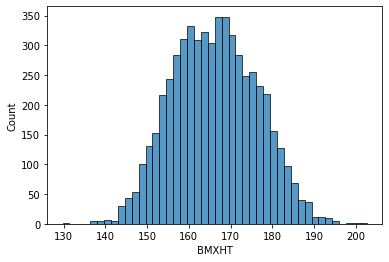

In [23]:
sns.histplot(da["BMXHT"], kde = False)
# insert your code here

<Axes: xlabel='BMXHT', ylabel='Count'>

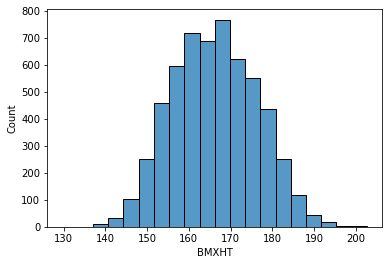

In [24]:
sns.histplot(da["BMXHT"], kde = False, bins=20)

<Axes: xlabel='BMXHT', ylabel='Count'>

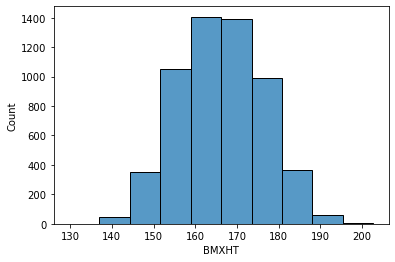

In [25]:
sns.histplot(da["BMXHT"], kde = False, bins=10)

<Axes: xlabel='BMXHT', ylabel='Count'>

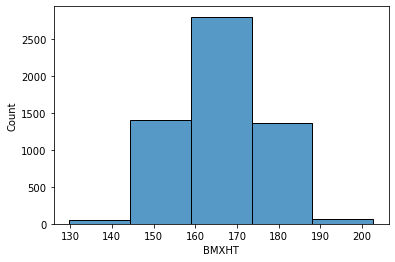

In [26]:
sns.histplot(da["BMXHT"], kde = False, bins=5)

<Axes: xlabel='BMXHT', ylabel='Count'>

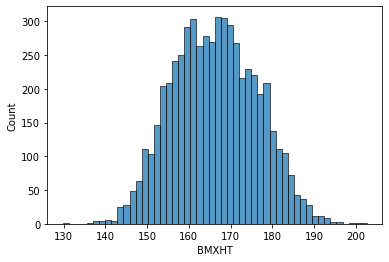

In [27]:
sns.histplot(da["BMXHT"], kde = False, bins=50)

<Axes: xlabel='BMXHT', ylabel='Count'>

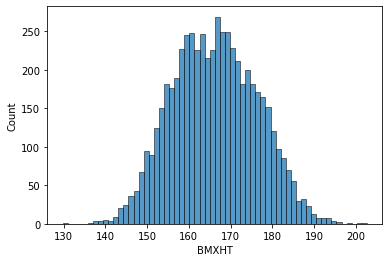

In [28]:
sns.histplot(da["BMXHT"], kde = False, bins=60)

__Q3a.__ Use the `bins` argument to [distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) to produce histograms with different numbers of bins.  Assess whether the default value for this argument gives a meaningful result, and comment on what happens as the number of bins grows excessively large or excessively small. 

__Q3b.__ Make separate histograms for the heights of women and men, then make a side-by-side boxplot showing the heights of women and men.

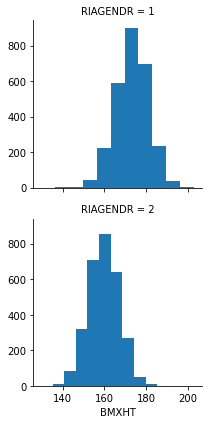

In [29]:
g = sns.FacetGrid(da, row = "RIAGENDR")
g = g.map(plt.hist, "BMXHT")

# insert your code here

<Axes: xlabel='RIAGENDR', ylabel='BMXHT'>

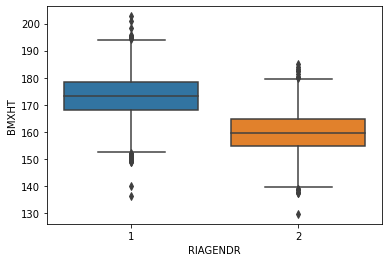

In [30]:
sns.boxplot(y=da["BMXHT"], x=da["RIAGENDR"]) 

__Q3c.__ Comment on what features, if any are not represented clearly in the boxplots, and what features, if any, are easier to see in the boxplots than in the histograms.

## Question 4

Make a boxplot showing the distribution of within-subject differences between the first and second systolic blood pressure measurents ([BPXSY1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXSY1) and [BPXSY2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXSY2)).

<Axes: xlabel='BP_Difference'>

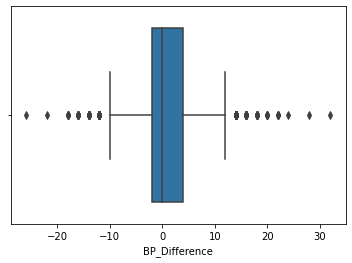

In [31]:
da['BP_Difference'] = da['BPXSY1'] - da['BPXSY2']

sns.boxplot(x=da['BP_Difference'])

__Q4a.__ What proportion of the subjects have a lower SBP on the second reading compared to the first?

In [32]:
da['BP_Difference'].describe()
# insert your code here

count    5369.000000
mean        0.674986
std         5.046465
min       -26.000000
25%        -2.000000
50%         0.000000
75%         4.000000
max        32.000000
Name: BP_Difference, dtype: float64

since the median is 0 so the proportion is 0%

__Q4b.__ Make side-by-side boxplots of the two systolic blood pressure variables.

<Axes: >

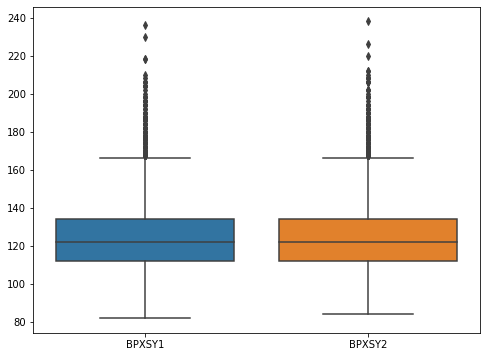

In [33]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=da[['BPXSY1', 'BPXSY2']])

__Q4c.__ Comment on the variation within either the first or second systolic blood pressure measurements, and the variation in the within-subject differences between the first and second systolic blood pressure measurements.

## Question 5

Construct a frequency table of household sizes for people within each educational attainment category (the relevant variable is [DMDEDUC2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDEDUC2)).  Convert the frequencies to proportions.

In [34]:
da["DMDEDUC2x"] = da.DMDEDUC2.replace({1: "<9", 2: "9-11", 3: "HS/GED", 4: "Some college/AA", 5: "College", 7: "Refused", 9: "Don't know"})
df=da.groupby('DMDEDUC2x')['DMDHHSIZ'].value_counts()

df=df.unstack()

df=df.apply(lambda x : x/x.sum(), axis =1)
df

DMDHHSIZ,1,2,3,4,5,6,7
DMDEDUC2x,,,,,,,
9-11,0.116641,0.222395,0.163297,0.152411,0.146190,0.113530,0.085537
<9,0.109924,0.224427,0.146565,0.132824,0.148092,0.108397,0.129771
College,0.142753,0.347731,0.193997,0.165447,0.095168,0.029283,0.025622
Don't know,NaN,0.666667,NaN,NaN,0.333333,NaN,NaN
HS/GED,0.152614,0.270658,0.171164,0.161889,0.109612,0.065767,0.068297
Some college/AA,0.151141,0.268970,0.193091,0.169031,0.122147,0.050586,0.045034


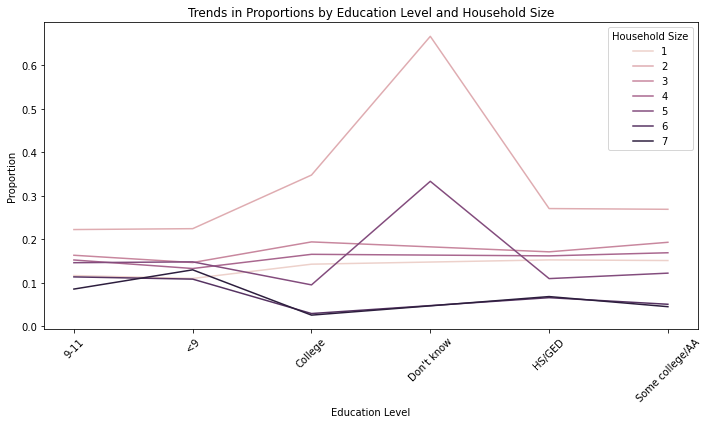

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your data is in a DataFrame called 'df'
plt.figure(figsize=(10, 6))
sns.lineplot(data=df.melt(ignore_index=False).reset_index(), x='DMDEDUC2x', y='value', hue='DMDHHSIZ', markers=True)
plt.title("Trends in Proportions by Education Level and Household Size")
plt.xlabel("Education Level")
plt.ylabel("Proportion")
plt.xticks(rotation=45)
plt.legend(title="Household Size", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

__Q5a.__ Comment on any major differences among the distributions.

__Q5b.__ Restrict the sample to people between 30 and 40 years of age.  Then calculate the median household size for women and men within each level of educational attainment.

In [36]:
dx["DMDEDUC2x"] = dx.DMDEDUC2.replace({1: "<9", 2: "9-11", 3: "HS/GED", 4: "Some college/AA", 5: "College", 7: "Refused", 9: "Don't know"})

dx.loc[dx['RIAGENDR']== 2].groupby('DMDEDUC2x')['DMDHHSIZ'].median()

C:\Users\adenu\AppData\Local\Temp\ipykernel_14584\492213230.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dx["DMDEDUC2x"] = dx.DMDEDUC2.replace({1: "<9", 2: "9-11", 3: "HS/GED", 4: "Some college/AA", 5: "College", 7: "Refused", 9: "Don't know"})


DMDEDUC2x
9-11               5.0
<9                 5.0
College            3.0
HS/GED             5.0
Some college/AA    4.0
Name: DMDHHSIZ, dtype: float64

## Question 6

The participants can be clustered into "maked variance units" (MVU) based on every combination of the variables [SDMVSTRA](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#SDMVSTRA) and [SDMVPSU](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#SDMVPSU).  Calculate the mean age ([RIDAGEYR](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIDAGEYR)), height ([BMXHT](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXHT)), and BMI ([BMXBMI](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXBMI)) for each gender ([RIAGENDR](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIAGENDR)), within each MVU, and report the ratio between the largest and smallest mean (e.g. for height) across the MVUs.

In [42]:
result= da.groupby(['SDMVSTRA', 'SDMVPSU','RIAGENDR'])['RIDAGEYR', 'BMXHT', 'BMXBMI'].mean()
result
# insert your code here

C:\Users\adenu\AppData\Local\Temp\ipykernel_14584\1610344248.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  result= da.groupby(['SDMVSTRA', 'SDMVPSU','RIAGENDR'])['RIDAGEYR', 'BMXHT', 'BMXBMI'].mean()


RIDAGEYR       BMXHT     BMXBMI
SDMVSTRA SDMVPSU RIAGENDR                                  
119      1       1         47.861111  172.741667  26.958333
                 2         47.663265  159.570408  30.052041
         2       1         54.363636  172.906818  27.160465
                 2         52.987952  159.244578  27.849398
120      1       1         43.130000  169.537755  30.939175
                 2         43.636364  155.402041  32.419388
         2       1         45.219178  173.075342  27.727397
                 2         43.736111  159.218056  27.400000
121      1       1         46.750000  172.177885  29.416505
                 2         44.397959  158.871579  30.856842
         2       1         42.063158  174.764516  26.273118
                 2         44.376344  160.229032  26.470968
122      1       1         44.653061  173.998969  28.528866
                 2         42.897436  161.315385  29.447436
         2       1         44.320000  170.332323  25.744444
                 2         47.333333  157.231111  26.611111
123      1       1         47.829787  174.315217  29.231522
                 2         44.841121  162.059615  29.905769
         2       1         52.126582  174.454430  28.811392
                 2         46.457447  160.476596  30.641489
124      1       1         50.750000  172.109009  28.614414
                 2         51.664000  158.788710  29.533065
         2       1         48.245614  174.291228  27.714035
                 2         42.541667  162.853521  28.640845
125      1       1         55.165289  173.631092  29.727731
                 2         50.900901  160.762385  30.385321
         2       1         49.705882  174.456863  29.143564
                 2         51.660000  160.021429  28.564286
126      1       1         48.416667  175.149398  29.033333
                 2         46.229167  160.387500  31.262500
         2       1         48.666667  174.713043  29.039130
                 2         47.205882  160.892000  29.612121
127      1       1         53.137931  171.545349  31.062353
                 2         49.694444  157.422430  32.189720
         2       1         54.070588  173.366667  30.557831
                 2         51.486239  159.022936  30.770642
128      1       1         53.673267  169.325000  31.749000
                 2         55.638462  156.339063  32.303125
         2       1         45.822785  172.400000  26.835443
                 2         45.589744  160.437179  27.491026
129      1       1         43.922222  171.094318  26.493182
                 2         45.329787  156.900000  29.019149
         2       1         45.775510  173.138298  28.961702
                 2         43.500000  161.034259  29.429630
130      1       1         50.516854  176.974157  30.337079
                 2         47.810526  161.977895  30.700000
         2       1         50.535354  175.061224  29.237755
                 2         50.833333  160.060577  31.490385
131      1       1         53.140187  175.610476  28.259615
                 2         54.893617  161.989362  30.061702
         2       1         46.778846  175.091346  30.077885
                 2         45.000000  161.673810  32.984127
132      1       1         42.380435  172.534066  28.546154
                 2         43.210526  161.508421  29.848421
         2       1         49.038760  172.809524  28.966667
                 2         51.700000  159.138281  30.540625
133      1       1         44.054795  171.509722  27.495833
                 2         45.105882  158.295122  27.959259
         2       1         47.489796  171.179167  27.966667
                 2         47.063158  158.627368  29.000000

In [45]:
result.groupby(['RIAGENDR'])['BMXHT'].agg(['max', 'min'])

,max,min
RIAGENDR,,
1,176.974157,169.325000
2,162.853521,155.402041


In [38]:
da.groupby(['SDMVSTRA', 'SDMVPSU','RIAGENDR'])['RIDAGEYR', 'BMXHT', 'BMXBMI'].mean().unstack()

C:\Users\adenu\AppData\Local\Temp\ipykernel_14584\1664650749.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  da.groupby(['SDMVSTRA', 'SDMVPSU','RIAGENDR'])['RIDAGEYR', 'BMXHT', 'BMXBMI'].mean().unstack()


RIDAGEYR                  BMXHT                 BMXBMI  \
RIAGENDR                  1          2           1           2          1   
SDMVSTRA SDMVPSU                                                            
119      1        47.861111  47.663265  172.741667  159.570408  26.958333   
         2        54.363636  52.987952  172.906818  159.244578  27.160465   
120      1        43.130000  43.636364  169.537755  155.402041  30.939175   
         2        45.219178  43.736111  173.075342  159.218056  27.727397   
121      1        46.750000  44.397959  172.177885  158.871579  29.416505   
         2        42.063158  44.376344  174.764516  160.229032  26.273118   
122      1        44.653061  42.897436  173.998969  161.315385  28.528866   
         2        44.320000  47.333333  170.332323  157.231111  25.744444   
123      1        47.829787  44.841121  174.315217  162.059615  29.231522   
         2        52.126582  46.457447  174.454430  160.476596  28.811392   
124      1        50.750000  51.664000  172.109009  158.788710  28.614414   
         2        48.245614  42.541667  174.291228  162.853521  27.714035   
125      1        55.165289  50.900901  173.631092  160.762385  29.727731   
         2        49.705882  51.660000  174.456863  160.021429  29.143564   
126      1        48.416667  46.229167  175.149398  160.387500  29.033333   
         2        48.666667  47.205882  174.713043  160.892000  29.039130   
127      1        53.137931  49.694444  171.545349  157.422430  31.062353   
         2        54.070588  51.486239  173.366667  159.022936  30.557831   
128      1        53.673267  55.638462  169.325000  156.339063  31.749000   
         2        45.822785  45.589744  172.400000  160.437179  26.835443   
129      1        43.922222  45.329787  171.094318  156.900000  26.493182   
         2        45.775510  43.500000  173.138298  161.034259  28.961702   
130      1        50.516854  47.810526  176.974157  161.977895  30.337079   
         2        50.535354  50.833333  175.061224  160.060577  29.237755   
131      1        53.140187  54.893617  175.610476  161.989362  28.259615   
         2        46.778846  45.000000  175.091346  161.673810  30.077885   
132      1        42.380435  43.210526  172.534066  161.508421  28.546154   
         2        49.038760  51.700000  172.809524  159.138281  28.966667   
133      1        44.054795  45.105882  171.509722  158.295122  27.495833   
         2        47.489796  47.063158  171.179167  158.627368  27.966667   

                             
RIAGENDR                  2  
SDMVSTRA SDMVPSU             
119      1        30.052041  
         2        27.849398  
120      1        32.419388  
         2        27.400000  
121      1        30.856842  
         2        26.470968  
122      1        29.447436  
         2        26.611111  
123      1        29.905769  
         2        30.641489  
124      1        29.533065  
         2        28.640845  
125      1        30.385321  
         2        28.564286  
126      1        31.262500  
         2        29.612121  
127      1        32.189720  
         2        30.770642  
128      1        32.303125  
         2        27.491026  
129      1        29.019149  
         2        29.429630  
130      1        30.700000  
         2        31.490385  
131      1        30.061702  
         2        32.984127  
132      1        29.848421  
         2        30.540625  
133      1        27.959259  
         2        29.000000

__Q6a.__ Comment on the extent to which mean age, height, and BMI vary among the MVUs.

__Q6b.__ Calculate the inter-quartile range (IQR) for age, height, and BMI for each gender and each MVU.  Report the ratio between the largest and smalles IQR across the MVUs.

In [46]:
df1=da.groupby(['SDMVSTRA', 'SDMVPSU','RIAGENDR'])['RIDAGEYR', 'BMXHT', 'BMXBMI'].quantile(0.75)
df2=da.groupby(['SDMVSTRA', 'SDMVPSU','RIAGENDR'])['RIDAGEYR', 'BMXHT', 'BMXBMI'].quantile(0.25)
df1-df2
# insert your code here

C:\Users\adenu\AppData\Local\Temp\ipykernel_14584\3036716156.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df1=da.groupby(['SDMVSTRA', 'SDMVPSU','RIAGENDR'])['RIDAGEYR', 'BMXHT', 'BMXBMI'].quantile(0.75)
C:\Users\adenu\AppData\Local\Temp\ipykernel_14584\3036716156.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df2=da.groupby(['SDMVSTRA', 'SDMVPSU','RIAGENDR'])['RIDAGEYR', 'BMXHT', 'BMXBMI'].quantile(0.25)


RIDAGEYR   BMXHT  BMXBMI
SDMVSTRA SDMVPSU RIAGENDR                          
119      1       1            29.75   9.000   5.350
                 2            31.25   9.325   9.750
         2       1            29.00  11.225   5.300
                 2            33.50   9.950   9.350
120      1       1            23.75  12.125   9.400
                 2            26.50   8.750   8.775
         2       1            26.00  10.500   7.100
                 2            25.75  10.550   7.750
121      1       1            34.50  10.725   7.500
                 2            26.25   9.150   9.000
         2       1            25.50   8.600   5.700
                 2            26.00   9.600   8.100
122      1       1            29.50   9.400   7.700
                 2            24.00  10.400   9.875
         2       1            30.00  10.150   4.100
                 2            25.00   7.575   8.475
123      1       1            28.25   9.350   8.050
                 2            30.50   9.675  10.450
         2       1            31.50   9.900   8.100
                 2            34.50  11.200   9.975
124      1       1            32.00   9.800   6.100
                 2            27.00   8.375   8.950
         2       1            31.00  11.600   8.700
                 2            23.50   8.650   9.000
125      1       1            29.00  10.350   8.300
                 2            31.00   9.100   8.000
         2       1            33.50   7.925   7.900
                 2            32.25  10.675  10.325
126      1       1            36.25  10.450   8.000
                 2            30.25   8.500  10.675
         2       1            34.00   8.125   6.850
                 2            31.75  12.025  10.350
127      1       1            30.00   9.025   8.200
                 2            27.25   7.700  11.750
         2       1            28.00  10.750   5.950
                 2            30.00  11.600   9.200
128      1       1            33.00   9.950   6.675
                 2            28.00   9.125   8.500
         2       1            25.50   9.850   5.800
                 2            22.00  10.650   9.375
129      1       1            20.75  12.300   6.025
                 2            24.75  10.375   9.500
         2       1            30.75  10.700   5.800
                 2            26.25   8.900   9.725
130      1       1            36.00   9.900   6.700
                 2            35.50   8.650  11.200
         2       1            28.50   8.625   8.375
                 2            30.25  10.225   8.050
131      1       1            36.00  10.500   7.525
                 2            35.75  10.025  11.075
         2       1            28.00   7.750   7.850
                 2            24.00   7.575  10.625
132      1       1            21.25  10.600   6.600
                 2            30.00  10.950  10.700
         2       1            38.00  10.550   9.600
                 2            33.00  10.100  11.750
133      1       1            33.00   8.925   6.425
                 2            34.00  10.300   8.300
         2       1            32.25   8.850   5.900
                 2            28.50   9.550   9.650

__Q6c.__ Comment on the extent to which the IQR for age, height, and BMI vary among the MVUs.